# Customer Churn Prediction - Complete ML Project
## 🎯 Goal: Predict which customers are likely to stop buying
### 📊 Dataset: Telecom Customer Churn Data

In [41]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print(" Customer Churn Prediction Project")
print("=" * 100)


 Customer Churn Prediction Project


In [10]:
# ==============================================================================
# 1. DATA LOADING AND INITIAL EXPLORATION
# ==============================================================================
df = pd.read_csv(r"C:\Users\Mohsu\Desktop\Telcom Data\WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Display basic information about the dataset
print("\n Dataset Overview:")
print(f"Dataset Shape: {df.shape}")
print(f"Number of Features: {df.shape[1] - 1}")
print(f"Number of Samples: {df.shape[0]}")



 Dataset Overview:
Dataset Shape: (7043, 21)
Number of Features: 20
Number of Samples: 7043


In [6]:
print("\n First 5 rows:")
print(df.head())


🔍 First 5 rows:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies    

In [8]:
print("\n Dataset Info:")
print(df.info())


📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 no

In [9]:
print("\n Target Variable Distribution:")
print(df['Churn'].value_counts())
print(f"Churn Rate: {df['Churn'].value_counts()['Yes'] / len(df) * 100:.2f}%")


🎯 Target Variable Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn Rate: 26.54%


In [14]:
# ==============================================================================
# 2. EXPLORATORY DATA ANALYSIS (EDA)
# ==============================================================================

# Check for missing values
print("\n Missing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


❓ Missing Values:
Series([], dtype: int64)


In [15]:
# Basic statistics for numerical columns
print("\n Numerical Features Statistics:")
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
print(df[numerical_cols].describe())


 Numerical Features Statistics:
            tenure  MonthlyCharges
count  7043.000000     7043.000000
mean     32.371149       64.761692
std      24.559481       30.090047
min       0.000000       18.250000
25%       9.000000       35.500000
50%      29.000000       70.350000
75%      55.000000       89.850000
max      72.000000      118.750000


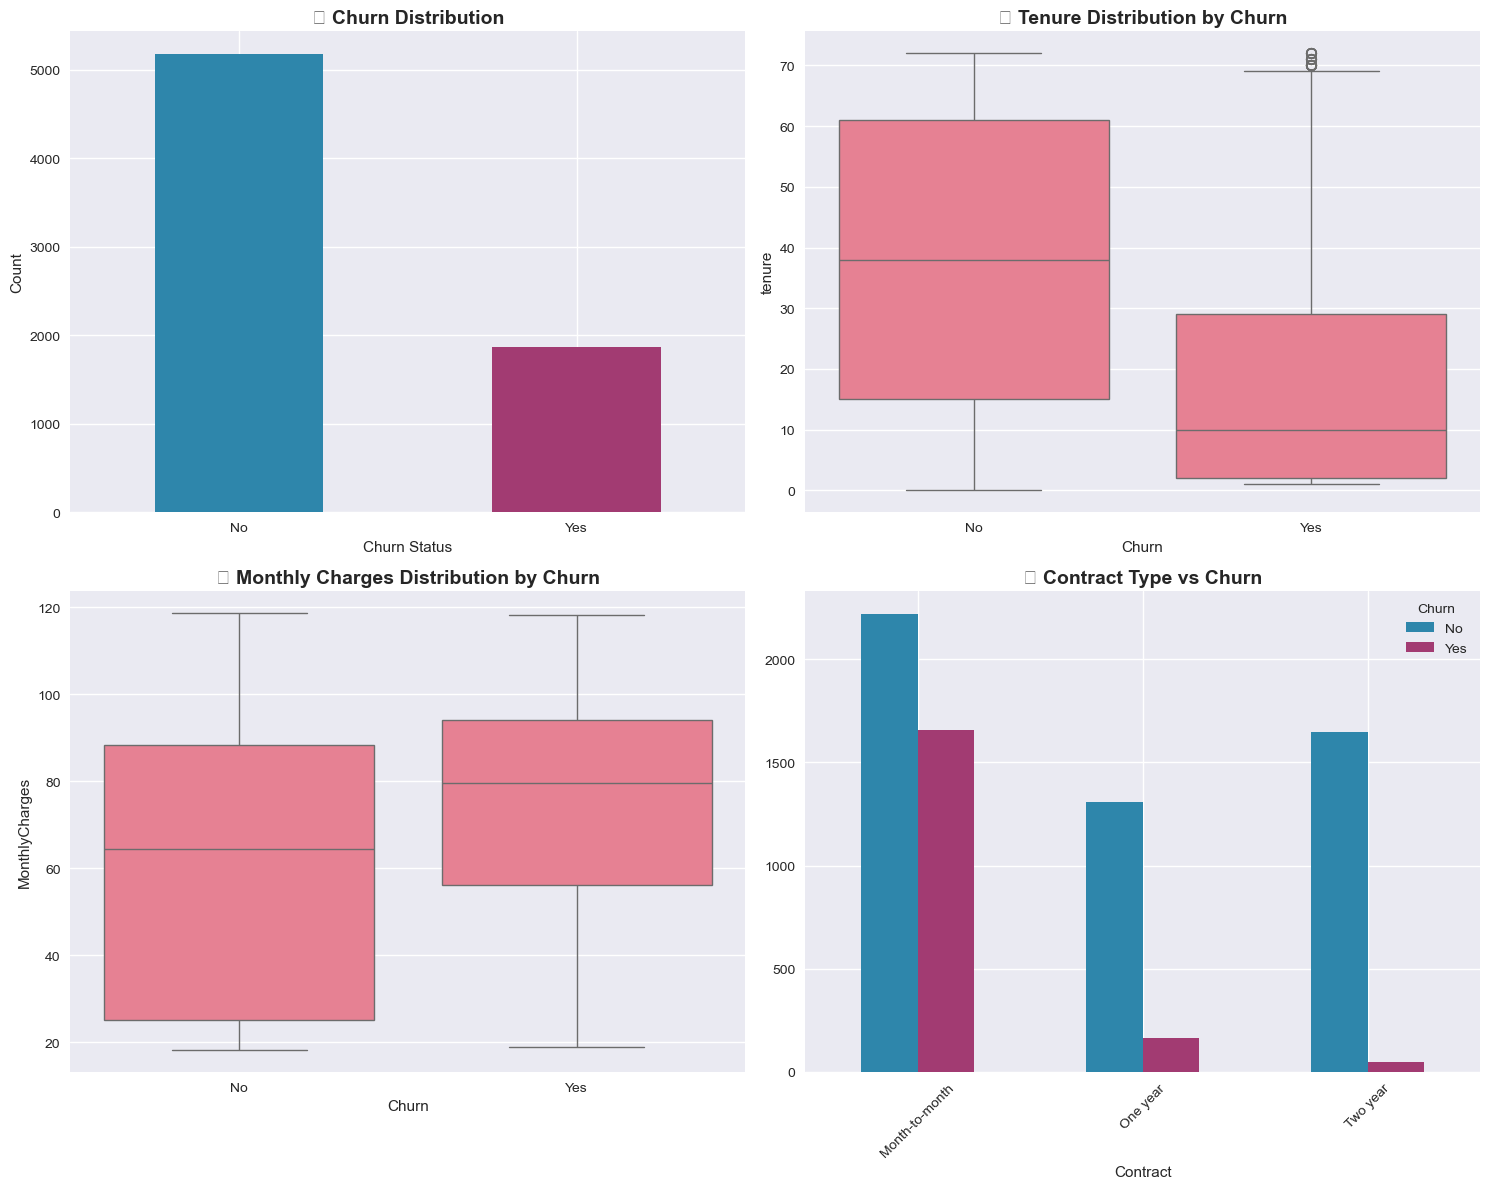

In [17]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Churn Distribution
df['Churn'].value_counts().plot(kind='bar', ax=axes[0,0], color=['#2E86AB', '#A23B72'])
axes[0,0].set_title(' Churn Distribution', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Churn Status')
axes[0,0].set_ylabel('Count')
axes[0,0].tick_params(axis='x', rotation=0)
# 2. Tenure Distribution by Churn
sns.boxplot(data=df, x='Churn', y='tenure', ax=axes[0,1])
axes[0,1].set_title(' Tenure Distribution by Churn', fontsize=14, fontweight='bold')

# 3. Monthly Charges Distribution by Churn
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', ax=axes[1,0])
axes[1,0].set_title(' Monthly Charges Distribution by Churn', fontsize=14, fontweight='bold')

# 4. Contract Type vs Churn
contract_churn = pd.crosstab(df['Contract'], df['Churn'])
contract_churn.plot(kind='bar', ax=axes[1,1], color=['#2E86AB', '#A23B72'])
axes[1,1].set_title(' Contract Type vs Churn', fontsize=14, fontweight='bold')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


🔗 Correlation Analysis:


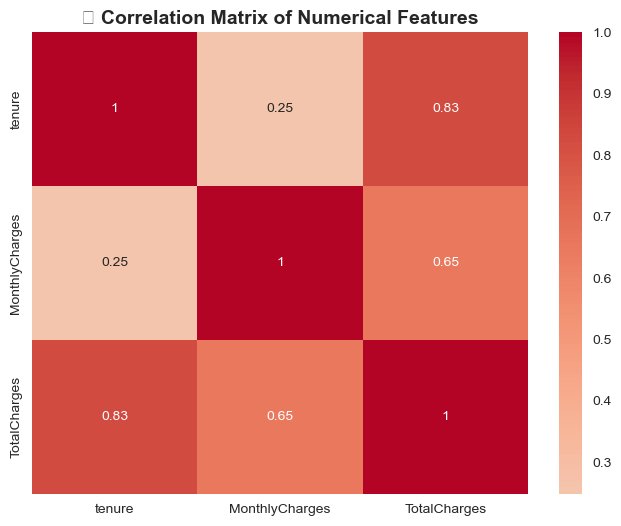

In [18]:
# Correlation analysis for numerical features
print("\n🔗 Correlation Analysis:")
numerical_df = df[['tenure', 'MonthlyCharges', 'TotalCharges']].copy()
# Convert TotalCharges to numeric (in case it's stored as string)
numerical_df['TotalCharges'] = pd.to_numeric(numerical_df['TotalCharges'], errors='coerce')

correlation_matrix = numerical_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('🔗 Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold')
plt.show()


In [30]:
# ==============================================================================
# 3. DATA PREPROCESSING
# ==============================================================================


# Create a copy of the dataset for preprocessing
df_processed = df.copy()

# Remove customerID as it's not useful for prediction
df_processed = df_processed.drop('customerID', axis=1)

# Handle TotalCharges - convert to numeric
df_processed['TotalCharges'] = pd.to_numeric(df_processed['TotalCharges'], errors='coerce')

# Fill missing values if any
imputer = SimpleImputer(strategy='median')
df_processed[['TotalCharges']] = imputer.fit_transform(df_processed[['TotalCharges']])

# Encode categorical variables
label_encoders = {}
categorical_columns = df_processed.select_dtypes(include=['object']).columns

for column in categorical_columns:
    if column != 'Churn':  # Don't encode target variable yet
        le = LabelEncoder()
        df_processed[column] = le.fit_transform(df_processed[column])
        label_encoders[column] = le

# Encode target variable
target_encoder = LabelEncoder()
df_processed['Churn'] = target_encoder.fit_transform(df_processed['Churn'])

print(" Data preprocessing completed!")
print(f"Processed dataset shape: {df_processed.shape}")
print("\n📋 Processed dataset info:")
print(df_processed.info())


 Data preprocessing completed!
Processed dataset shape: (7043, 20)

📋 Processed dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  


In [31]:
# ==============================================================================
# 4. FEATURE ENGINEERING
# ==============================================================================


# Create new features
df_processed['ChargesPerTenure'] = df_processed['TotalCharges'] / (df_processed['tenure'] + 1)
df_processed['IsNewCustomer'] = (df_processed['tenure'] <= 12).astype(int)
df_processed['HighValueCustomer'] = (df_processed['MonthlyCharges'] > df_processed['MonthlyCharges'].median()).astype(int)

# Create service engagement score
service_columns = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df_processed['ServiceEngagement'] = df_processed[service_columns].sum(axis=1)

print(" Feature engineering completed!")
print(f"New features added: ChargesPerTenure, IsNewCustomer, HighValueCustomer, ServiceEngagement")
print(f"Final dataset shape: {df_processed.shape}")

 Feature engineering completed!
New features added: ChargesPerTenure, IsNewCustomer, HighValueCustomer, ServiceEngagement
Final dataset shape: (7043, 24)


In [32]:
# ==============================================================================
# 5. MODEL PREPARATION
# ==============================================================================

# Prepare features and target
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f" Data split completed!")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Training set churn rate: {y_train.mean():.3f}")
print(f"Test set churn rate: {y_test.mean():.3f}")

 Data split completed!
Training set shape: (5634, 23)
Test set shape: (1409, 23)
Training set churn rate: 0.265
Test set churn rate: 0.265


In [33]:
# ==============================================================================
# 6. MODEL TRAINING AND EVALUATION
# ==============================================================================



# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    print(f"\n Training {name}...")
    
    # Use scaled data for Logistic Regression, original for Random Forest
    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'auc_score': auc_score,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    print(f" {name} Results:")
    print(f"   Accuracy: {accuracy:.4f}")
    print(f"   AUC Score: {auc_score:.4f}")
    print(f"   Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))


 Training Logistic Regression...
 Logistic Regression Results:
   Accuracy: 0.8034
   AUC Score: 0.8454
   Classification Report:
              precision    recall  f1-score   support

    No Churn       0.84      0.90      0.87      1035
       Churn       0.66      0.53      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409


 Training Random Forest...
 Random Forest Results:
   Accuracy: 0.7906
   AUC Score: 0.8239
   Classification Report:
              precision    recall  f1-score   support

    No Churn       0.83      0.90      0.86      1035
       Churn       0.63      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



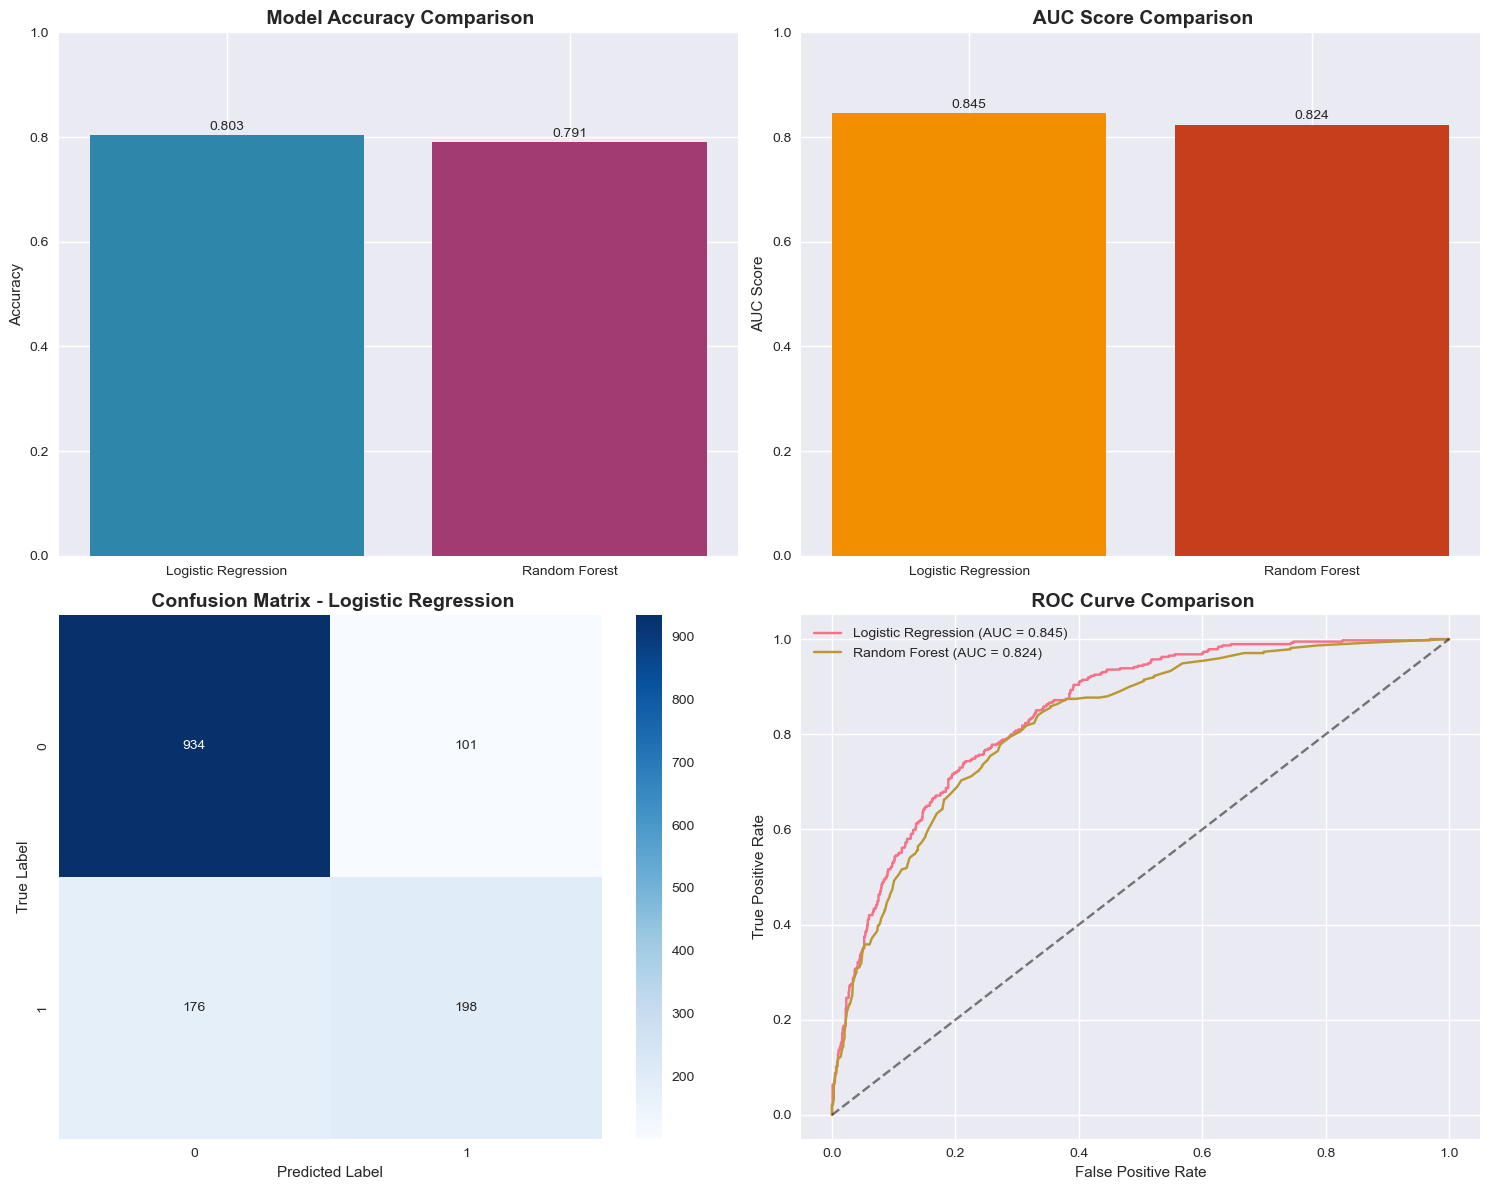

In [35]:

# ==============================================================================
# 7. MODEL COMPARISON AND VISUALIZATION
# ==============================================================================


# Create comparison plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Accuracy Comparison
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]
auc_scores = [results[name]['auc_score'] for name in model_names]

axes[0,0].bar(model_names, accuracies, color=['#2E86AB', '#A23B72'])
axes[0,0].set_title(' Model Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].set_ylim(0, 1)
for i, v in enumerate(accuracies):
    axes[0,0].text(i, v + 0.01, f'{v:.3f}', ha='center')

# 2. AUC Score Comparison
axes[0,1].bar(model_names, auc_scores, color=['#F18F01', '#C73E1D'])
axes[0,1].set_title(' AUC Score Comparison', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('AUC Score')
axes[0,1].set_ylim(0, 1)
for i, v in enumerate(auc_scores):
    axes[0,1].text(i, v + 0.01, f'{v:.3f}', ha='center')

# 3. Confusion Matrix for best model
best_model_name = max(results, key=lambda x: results[x]['auc_score'])
cm = confusion_matrix(y_test, results[best_model_name]['y_pred'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1,0])
axes[1,0].set_title(f' Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('True Label')
axes[1,0].set_xlabel('Predicted Label')

# 4. ROC Curve
for name in model_names:
    fpr, tpr, _ = roc_curve(y_test, results[name]['y_pred_proba'])
    axes[1,1].plot(fpr, tpr, label=f'{name} (AUC = {results[name]["auc_score"]:.3f})')

axes[1,1].plot([0, 1], [0, 1], 'k--', alpha=0.5)
axes[1,1].set_xlabel('False Positive Rate')
axes[1,1].set_ylabel('True Positive Rate')
axes[1,1].set_title(' ROC Curve Comparison', fontsize=14, fontweight='bold')
axes[1,1].legend()

plt.tight_layout()
plt.show()


 FEATURE IMPORTANCE ANALYSIS
 Top 10 Most Important Features:
              feature  importance
18       TotalCharges    0.140889
17     MonthlyCharges    0.131463
19   ChargesPerTenure    0.130045
4              tenure    0.120702
14           Contract    0.063084
8      OnlineSecurity    0.043611
16      PaymentMethod    0.043318
22  ServiceEngagement    0.037302
11        TechSupport    0.034876
20      IsNewCustomer    0.030128


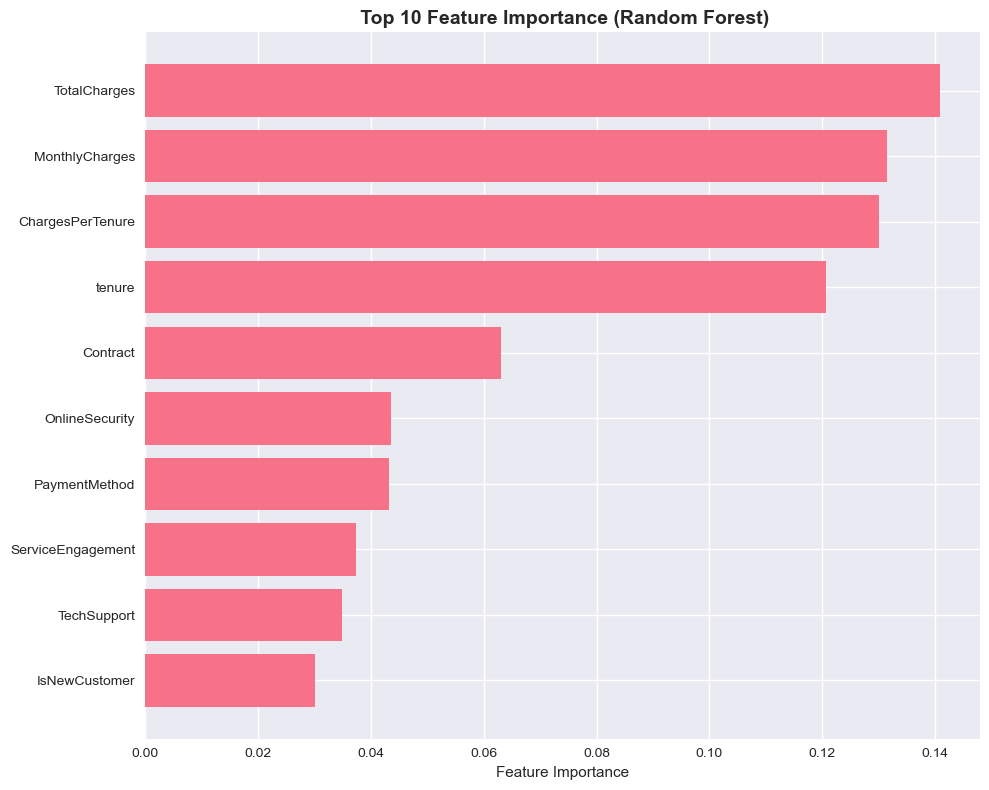

In [36]:
# ==============================================================================
#  FEATURE IMPORTANCE ANALYSIS
# ==============================================================================

print("\n" + "="*50)
print(" FEATURE IMPORTANCE ANALYSIS")
print("="*50)

# Get feature importance from Random Forest
rf_model = results['Random Forest']['model']
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(" Top 10 Most Important Features:")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(10)
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Feature Importance')
plt.title(' Top 10 Feature Importance (Random Forest)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [37]:
# ==============================================================================
# 9. BUSINESS INSIGHTS AND RECOMMENDATIONS
# ==============================================================================


print(" KEY FINDINGS:")
print("1. Model Performance:")
print(f"   - Best performing model: {best_model_name}")
print(f"   - Accuracy: {results[best_model_name]['accuracy']:.3f}")
print(f"   - AUC Score: {results[best_model_name]['auc_score']:.3f}")

print("\n2. Important Churn Predictors:")
for i, row in feature_importance.head(5).iterrows():
    print(f"   - {row['feature']}: {row['importance']:.3f}")

print("\n BUSINESS RECOMMENDATIONS:")
print("1. Focus on customer retention strategies for:")
print("   - New customers (tenure < 12 months)")
print("   - Customers with month-to-month contracts")
print("   - High monthly charge customers")

print("\n2. Implement targeted interventions:")
print("   - Offer long-term contract incentives")
print("   - Provide additional services to increase engagement")
print("   - Monitor payment method preferences")

print("\n3. Early warning system:")
print("   - Use this model to identify at-risk customers")
print("   - Implement proactive retention campaigns")
print("   - Regular model retraining with new data")

print("\n MODEL DEPLOYMENT READINESS:")
print(" Model trained and validated")
print(" Feature engineering pipeline established")
print(" Performance benchmarks set")
print(" Business insights documented")
print(" Ready for production deployment!")


 

 KEY FINDINGS:
1. Model Performance:
   - Best performing model: Logistic Regression
   - Accuracy: 0.803
   - AUC Score: 0.845

2. Important Churn Predictors:
   - TotalCharges: 0.141
   - MonthlyCharges: 0.131
   - ChargesPerTenure: 0.130
   - tenure: 0.121
   - Contract: 0.063

 BUSINESS RECOMMENDATIONS:
1. Focus on customer retention strategies for:
   - New customers (tenure < 12 months)
   - Customers with month-to-month contracts
   - High monthly charge customers

2. Implement targeted interventions:
   - Offer long-term contract incentives
   - Provide additional services to increase engagement
   - Monitor payment method preferences

3. Early warning system:
   - Use this model to identify at-risk customers
   - Implement proactive retention campaigns
   - Regular model retraining with new data

 MODEL DEPLOYMENT READINESS:
 Model trained and validated
 Feature engineering pipeline established
 Performance benchmarks set
 Business insights documented
 Ready for production dep

In [40]:

# Note: To save the model, you would use:
# import joblib
# joblib.dump(results[best_model_name]['model'], 'best_churn_model.pkl')
# joblib.dump(scaler, 'scaler.pkl')